::: {.callout-tip}
## Reading

**Data:** @white_frequency_2020 on collecting a broad-coverage acceptability judgment dataset focused on complement clauses and @white_computational_2016 on using that dataset to develop a computational model of selection. We will use the data collected for those papers, which can be found [here](http://megaattitude.io/projects/mega-acceptability/), in this module.

**Theory:** @lohninger_typology_2020 on the typology of complement clauses. We will specifically be concerned with their hypothesis that the distributional complement clauses is constrained by a monotonicity constraint relating ordered semantic types to ordered syntactic types.
:::

In [ ]:
TELL ENT ENT PROP
B       B      B       B      I         I
someone told   someone that   something happened

In [126]:
#!wget http://megaattitude.io/projects/mega-acceptability/mega-acceptability-v1.zip -P data/
#!unzip data/mega-acceptability-v1.zip -d data/

data_dir = "./data/mega-acceptability-v1/"

In [127]:
import os
import pandas as pd

def load_data(fname: str, verbose: bool = True) -> pd.DataFrame:
    # read the raw data skipping comment rows at the beginning
    data = pd.read_csv(fname, sep="\t")
    
    if verbose:
        n_datapoints = data.shape[0]
        print(f"The full dataset has {n_datapoints} datapoints.")
    
    # remove non-native speakers
    data = data.query("nativeenglish")
    
    if verbose:
        n_datapoints_native = data.shape[0]
        print(f"Removing {n_datapoints - n_datapoints_native} "
              "responses from nonnative speakers.")
    
    # remove NaN judgments
    data = data.query("~response.isnull()")
    
    if verbose:
        n_datapoints_nonnull = data.shape[0]
        print(f"Removing {n_datapoints_native - n_datapoints_nonnull} NA responses.")
    
    return data

In [128]:
data = load_data(os.path.join(data_dir, "mega-acceptability-v1.tsv"))

data

The full dataset has 250000 datapoints.
Removing 600 responses from nonnative speakers.
Removing 10 NA responses.


,participant,list,presentationorder,verb,frame,response,nativeenglish,sentence
0,4,862,1,turn_out,NP was Ved whichNP to VP,2.0,True,Someone was turned out which thing to do.
1,381,862,1,turn_out,NP was Ved whichNP to VP,1.0,True,Someone was turned out which thing to do.
2,395,862,1,turn_out,NP was Ved whichNP to VP,2.0,True,Someone was turned out which thing to do.
3,621,862,1,turn_out,NP was Ved whichNP to VP,1.0,True,Someone was turned out which thing to do.
4,527,862,1,turn_out,NP was Ved whichNP to VP,1.0,True,Someone was turned out which thing to do.
...,...,...,...,...,...,...,...,...
249995,113,928,50,madden,NP Ved about NP,4.0,True,Someone maddened about something.
249996,32,928,50,madden,NP Ved about NP,2.0,True,Someone maddened about something.
249997,544,928,50,madden,NP Ved about NP,1.0,True,Someone maddened about something.
249998,727,928,50,madden,NP Ved about NP,7.0,True,Someone maddened about something.


@white_computational_2016 model the ordinal acceptability judgments $r_i$ associated with a sentence $s_i$ to be a function of the probability $\alpha_{vf}$ that the main clause verb $v = \text{verb}(i)$ in $s_i$ is acceptable in the syntactic frame $f = \text{frame}(i)$ instantiated in $s_i$.^[In fact, not all predicates found in their sentences are necessarily verbs. Some–e.g. *annoy*–are likely to be (deverbal) adjectives in some frames. We'll continue to just refer to these predicates as verbs.] They model this probability as a function of two other kinds of probability: (i) the probability $\lambda_{vs}$ that a particular verb $v$ can have a particular semantic type signature $s$; and (ii) the probability $\mu_{sf}$ that a particular semantic type signature $s$ can be mapped onto a particular syntactic frame $f$.

The basic idea is that we should predict a verb to be good–modulo other factors, such as its case assignment properties [@pesetsky_zero_1991]–in a particular syntactic frame insofar as it can have at least one semantic type signature that maps onto that frame. That is, they define the probability $\alpha_{vf}$ that a main clause verb $v$ is acceptable in a syntactic frame $f$ to be $p\left(\bigvee_s l_{vs} \land m_{sf}\right)$, where:

$$\begin{align*}
l_{vs} &= \begin{cases}
\top & \text{if } v \text{ can have semantic type signature } s\\
\bot & \text{otherwise}
\end{cases}\\
m_{sf} &= \begin{cases}
\top & \text{if } s \text{ can map onto syntactic frame } f\\
\bot & \text{otherwise}
\end{cases}
\end{align*}$$

Insofar as a verb's having a particular type signature is independent of that type signature mapping onto a particular syntactic frame, this probability can be *factored* into an expression in terms of $\lambda_{vs}$ and $\mu_{sf}$:

$$\begin{align*}
p\left(\bigvee_s l_{vs} \land m_{sf}\right) &= p\left(\lnot\lnot\bigvee_s l_{vs} \land m_{sf}\right)\\
&= 1 - p\left(\lnot\bigvee_s l_{vs} \land m_{sf}\right)\\
&= 1 - p\left(\bigwedge_s \lnot\left[ l_{vs} \land m_{sf}\right]\right)\\
&= 1 - \prod_s p\left(\lnot\left[ l_{vs} \land m_{sf}\right]\right)\\
&= 1 - \prod_s 1 - p\left(l_{vs} \land m_{sf}\right)\\
&= 1 - \prod_s 1 - p\left(l_{vs}\right)p\left(m_{sf}\right)\\
&= 1 - \prod_s 1 - \lambda_{vs}\mu_{sf}\\
\end{align*}$$

Importantly, they assume: (a) that verbs can be compatible with multiple semantic type signatures; (b) that multiple semantic type signatures can map onto the same frame; and (c) that multiple frames can be mapped onto by the same semantic type signature. So $\sum_s \lambda_{vs}$ and $\sum_s \mu_{sf}$ can be anywhere between $0$ and the number of type signatures, and $\sum_f \mu_{sf}$ can be anywhere between $0$ and the number of syntactic frames. None of the three need to be $1$.

Solving for $\lambda_{vs}$ and $\mu_{sf}$, from which $\alpha_{vf}$ can be computed deterministically, is an instance of a [matrix factorization](https://en.wikipedia.org/wiki/Matrix_decomposition) problem–of which [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) [PCA; @pearson_lines_1901], [factor analysis](https://en.wikipedia.org/wiki/Factor_analysis), and [postive/non-negative matrix factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) [NMF; @paatero_positive_1994] are common forms. 

In [129]:
from numpy import ndarray
from pandas import CategoricalDtype

def hash_series(series: pd.Series, categories: Optional[list[str]] = None, indexation: int=1) -> tuple[ndarray, ndarray]:
    """Hash a series to numeric codes
    
    Parameters
    ----------
    column
        The series to hash
    index
        The starting index (defaults to 1)
    """
    # enforce 0- or 1-indexation
    if indexation not in [0, 1]:
        raise ValueError("Must choose either 0- or 1-indexation.")
    
    # convert the series to a category
    if categories is None:
        category_series = series.astype("category")
    else:
        cat_type = CategoricalDtype(categories=categories)
        category_series = series.astype(cat_type)
    
    # get the hash
    hash_map = category_series.cat.categories.values
    
    # map to one-indexed codes
    hashed_series = (category_series.cat.codes + indexation).values
    
    return hash_map, hashed_series

In [130]:
import cmdstanpy, arviz
from cmdstanpy import CmdStanModel
from typing import Optional
from enum import Enum
from dataclasses import dataclass
from arviz import InferenceData

class FitType(Enum):
    OPTIMIZE = 0
    SAMPLE = 1

@dataclass
class SelectionData:
    N_verb: int
    N_frame: int
    N_component: int
    N_subj: int
    N_resp: int
    N_resp_levels: int
    verb: ndarray
    frame: ndarray
    subj: ndarray
    resp: ndarray
    
class UnconstrainedSelectionModel:
    stan_file = "./models/fuzzy-logic-factorization.stan"
    data_class = SelectionData
    
    def __init__(self, n_component: int):
        self.model = CmdStanModel(stan_file=self.stan_file)
        self.n_component = n_component
        
    def construct_model_data(self, data: pd.DataFrame):
        self.verb_hash_map, verb_hashed = hash_series(data.verb)
        self.frame_hash_map, frame_hashed = hash_series(data.frame)
        self.subj_hash_map, subj_hashed = hash_series(data.participant)
        
        model_data = {
            "N_verb": self.verb_hash_map.shape[0],
            "N_frame": self.frame_hash_map.shape[0],
            "N_component": self.n_component,
            "N_subj": self.subj_hash_map.shape[0],
            "N_resp": data.shape[0],
            "N_resp_levels": 7,
            "verb": verb_hashed,
            "frame": frame_hashed,
            "subj": subj_hashed,
            "resp": data.response.astype(int).values
        }
        
        return model_data
        
    def _validate_data(self):
        self.data_class(**self.model_data)

    def fit(
        self, 
        data: pd.DataFrame,
        fit_type: FitType = FitType.OPTIMIZE,
        save_dir: Optional[str] = None,
        verbose: bool = True, 
        show_progress: bool = True
    ) -> InferenceData:
        self.model_data = self.construct_model_data(data)
        
        self._validate_data()
        
        if verbose:
            print("Fitting model...")
        
        self.fit_type = fit_type
        
        if fit_type == FitType.OPTIMIZE:
            self.raw_model_fit = self.model.optimize(
                data=self.model_data
            )
        else:
            self.raw_model_fit = self.model.sample(
                data=self.model_data, 
                show_progress=show_progress
            )
    
        if save_dir is not None:
            if verbose:
                print("Saving model...")

            self.save(save_dir)
        
        if verbose:
            print("Saving model...")
    
        return self
    
    def pointwise_log_likelihoods(self, data: Optional[pd.DataFrame] = None, **kwargs) -> InferenceData:
        if data is None:
            model_data = self.model_data
        else:
            model_data = self.construct_model_data(data, **kwargs)
            
        log_likelihoods = self.model.generate_quantities(
            data=model_data, 
            previous_fit=self.raw_model_fit
        )

        return arviz.from_cmdstanpy(log_likelihoods)
    
    @property
    def model_fit(self):
        if fit_type == FitType.OPTIMIZE:
            return self.raw_model_fit
        else:
            return arviz.from_cmdstanpy(self.raw_model_fit)
    
    def save(self, save_dir: str = "."):
        self.raw_model_fit.save_csvfiles(save_dir)
    
    @classmethod
    def from_csv(cls, path: str, **kwargs):
        model = cls(**kwargs)
        model.raw_model_fit = cmdstanpy.from_csv(path)

In [313]:
model = UnconstrainedSelectionModel(2, 1., False).fit(data, fit_type=FitType.OPTIMIZE)

TypeError: FuzzyLogicFactorizationModel.__init__() takes 2 positional arguments but 4 were given

SignificanceResult(statistic=0.40889891447222454, pvalue=0.0)

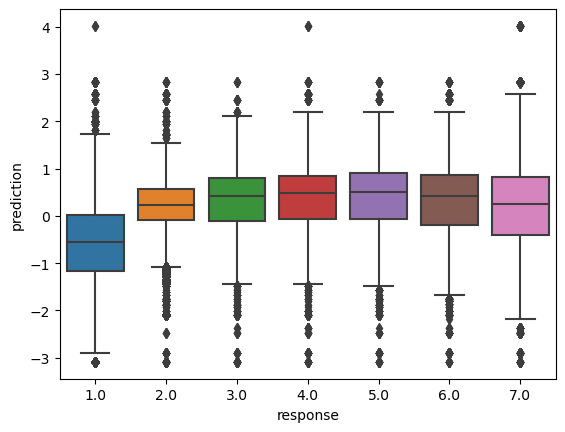

In [32]:
import seaborn as sns

from scipy.stats import spearmanr

data["prediction"] = model.raw_model_fit.stan_variable('mu')

_ = sns.boxplot(data, x="response", y="prediction")

spearmanr(data[["response", "prediction"]])

In [33]:
model.raw_model_fit.stan_variables()

{'verb_component_prior_aux': array([0.128443, 0.125146, 0.656217, 0.779327, 0.827608, 0.312784,
        0.848003, 0.808027, 0.422028, 0.375185, 0.353681, 0.327297,
        0.733399, 0.854325, 0.778634, 0.227325, 0.146691, 0.721576,
        0.527884, 0.123827, 0.275521, 0.370464, 0.702175, 0.879695,
        0.138056, 0.174648, 0.21029 , 0.766008, 0.151918, 0.292663]),
 'frame_component_prior_aux': array([0.128859, 0.439508, 0.856828, 0.384938, 0.652028, 0.662436,
        0.824644, 0.492884, 0.45846 , 0.13276 , 0.347303, 0.768129,
        0.386184, 0.876037, 0.26281 , 0.127104, 0.329268, 0.743779,
        0.685283, 0.393859, 0.327524, 0.212908, 0.138822, 0.342837,
        0.870582, 0.866983, 0.29064 , 0.391456, 0.875311, 0.81953 ]),
 'verb_component_prior_precision': array([3.94606 , 6.85934 , 2.14684 , 0.355818, 4.316   , 0.66685 ,
        2.00714 , 2.95657 , 0.277982, 0.313856, 3.66564 , 3.61452 ,
        0.270871, 6.10048 , 0.198073, 0.690347, 0.306669, 0.487583,
        0.321813, 0.2

In [36]:
torch.tensor??

Docstring:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.

.. seealso::

    :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
    :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the de

In [88]:
@dataclass
class SelectionModelParameters:
    n_verb: int
    n_frame: int
    n_subj: int
    n_resp_levels: int
    
@dataclass
class UnconstrainedSelectionModelParameters(SelectionModelParameters):
    n_component: int

@dataclass
class SelectionData:
    verb: ndarray
    frame: ndarray
    subj: ndarray
    resp: ndarray

In [80]:
import torch
from torch import Tensor

def ordered_logistic_likelihood(value: Tensor, jumps: Tensor, center: bool = True) -> Tensor:
    """Compute the ordered logistic likelihood given a value
    
    Parameters
    ----------
    value
        The value to compute the likelihood for 
        (shape: batch_size)
    jumps
        The distance between cutpoints 
        (shape: batch_size x number of response levels - 1)

    Returns
    -------
    log_likelihood
        the ordered logistic log-likelihood
    """
    cutpoints = torch.cumsum(jumps, 1) 
    
    if center:
        cutpoints = cutpoints - cutpoints.mean()
    
    cdfs = torch.sigmoid(cutpoints - value[:,None])

    low_prob = torch.cat(
        [torch.zeros([cdfs.shape[0], 1]), cdfs],
        axis=1
    )
    high_prob = torch.cat(
        [cdfs, torch.ones([cdfs.shape[0], 1])],
        axis=1
    )
    
    return high_prob - low_prob

In [99]:
class UnconstrainedSelectionModel(torch.nn.Module):
    parameter_class = UnconstrainedSelectionModelParameters
    data_class = SelectionData
    
    def __init__(self, parameters: UnconstrainedSelectionModelParameters):
        super().__init__()
        
        self.model_parameters = parameters
        
        self.verb_component_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_verb, parameters.n_component
            ]), 
            requires_grad=True
        )
        self.frame_component_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_frame, parameters.n_component
            ]), 
            requires_grad=True
        )
        
        self.log_jumps = torch.nn.Parameter(
            torch.ones([
                parameters.n_subj, parameters.n_resp_levels-1
            ]), 
            requires_grad=True
        )
        

    def forward(self, data: SelectionData):
        verb_frame_prob = self.verb_frame_prob(data.verb, data.frame)
        verb_frame_logodds = torch.log(verb_frame_prob) - torch.log(1. - verb_frame_prob)
        
        jumps = self.jumps[data.subj]
        
        return ordered_logistic_likelihood(
            verb_frame_logodds, jumps
        )
    
    def verb_frame_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        if verb_idx is not None or frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_component_prob[verb_idx,:] * 
                     self.frame_component_prob[frame_idx,:],
                axis=1
            )
        elif verb_idx is None and frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_component_prob[:,None,:] * 
                     self.frame_component_prob[:,frame_idx,:],
                axis=2
            )
        elif verb_idx is not None and frame_idx is None:
            return 1. - torch.prod(
                1. - self.verb_component_prob[verb_idx,None,:] * 
                     self.frame_component_prob[None,:,:],
                axis=2
            )
        else:
            return 1. - torch.prod(
                1. - self.verb_component_prob[:,None,:] * 
                     self.frame_component_prob[None,:,:],
                axis=2
            )       
    
    @property
    def verb_component_prob(self) -> Tensor:
        return torch.sigmoid(self.verb_component_aux)
    
    @property
    def frame_component_prob(self) -> Tensor:
        return torch.sigmoid(self.frame_component_aux)
    
    @property
    def jumps(self):
        return torch.exp(self.log_jumps)

In [100]:
from abc import ABC, abstractmethod

class SelectionModelTrainer(ABC):
    data_class = SelectionData
    
    @abstractmethod
    def construct_model_parameters(self, data: pd.DataFrame) -> SelectionModelParameters:
        raise NotImplementedError
        
    def construct_model_data(self, data: pd.DataFrame) -> SelectionData:            
        if hasattr(self, "frame_hash_map"):
            _, frame_hashed = hash_series(data.frame, self.frame_hash_map, indexation=0)
        else:
            self.frame_hash_map, frame_hashed = hash_series(data.frame, indexation=0)
            
        if hasattr(self, "verb_hash_map"):
            _, verb_hashed = hash_series(data.verb, self.verb_hash_map, indexation=0)
        else:
            self.verb_hash_map, verb_hashed = hash_series(data.verb, indexation=0)

        if hasattr(self, "subj_hash_map"):
            _, subj_hashed = hash_series(data.participant, self.subj_hash_map, indexation=0)
        else:
            self.subj_hash_map, subj_hashed = hash_series(data.participant, indexation=0)
        
        model_data = {
            "verb": verb_hashed,
            "frame": frame_hashed,
            "subj": subj_hashed,
            "resp": data.response.astype(int).values - 1
        }
        
        return self.data_class(**model_data)
    
    def _initialize_model(self, data: pd.DataFrame):
        model_parameters = self.construct_model_parameters(data)
        
        return self.model_class(model_parameters)
    
    def fit(
        self, data: pd.DataFrame, batch_size=1000, n_epochs:int=1000, 
        lr: float = 1e-5, verbosity: int=100
    ) -> UnconstrainedSelectionModel:
        # necessary for initializing hashes
        self.model_data = self.construct_model_data(data)
        self.model = self._initialize_model(data)
        
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        
        for e in range(n_epochs):
            data_shuffled = data.sample(frac=1.).reset_index(drop=True)
            
            n_batches = int(data_shuffled.shape[0]/batch_size)
        
            epoch_total_loss = 0.
        
            correlations = []
            
            for i in range(n_batches):
                lower_bound = i*batch_size
                
                if i == (n_batches - 1):
                    upper_bound = data_shuffled.shape[0]
                else:
                    upper_bound = (i+1)*batch_size

                data_sub = self.construct_model_data(data_shuffled.iloc[lower_bound:upper_bound])
                target = torch.tensor(data_sub.resp)

                optimizer.zero_grad()

                probs = self.model(data_sub)
                logprobs = torch.log(probs)

                loss = self.loss_function(logprobs, target)

                # compute correlation between expected value and target
                expected_value = torch.sum(
                    torch.arange(1, probs.shape[1]+1)[None,:] * probs, 
                    axis=1
                )
                corr = torch.corrcoef(
                    torch.cat([
                        expected_value[None,:], 
                        target[None,:]
                    ], axis=0)
                )
                correlations.append(corr[0,1].item())
                
                loss.backward()

                optimizer.step()
                
                epoch_total_loss += loss.item()
                
            if verbosity and not e % verbosity:
                print(f"Epoch:       {e}")
                print(f"Loss:        {np.round(epoch_total_loss, 2)}")
                print(f"Mean corr.:  {np.round(np.mean(correlations), 2)}")
                print()
                
        
        return self
    
    def expected_value(self, data: pd.DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        expected_value = torch.sum(
            torch.arange(1, 8)[None,:] * probs, 
            axis=1
        )
        
        return expected_value
    
    def likelihood(self, data: pd.DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        return probs[model_data.resp]
    
    def predict(self, data: pd.DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        return probs[model_data.resp]

In [101]:
class UnconstrainedSelectionModelTrainer(SelectionModelTrainer):
    parameter_class = UnconstrainedSelectionModelParameters
    model_class = UnconstrainedSelectionModel
    
    def __init__(self, n_component: int):
        self.n_component = n_component
        
        self.loss_function = torch.nn.CrossEntropyLoss(reduction="sum")
    
    def construct_model_parameters(self, data: pd.DataFrame) -> UnconstrainedSelectionModelParameters:
        model_parameters = {
            "n_verb": self.verb_hash_map.shape[0],
            "n_frame": self.frame_hash_map.shape[0],
            "n_subj": self.subj_hash_map.shape[0],
            "n_resp_levels": 7,
            "n_component": self.n_component
        }
        
        return self.parameter_class(**model_parameters)
    
m = UnconstrainedSelectionModelTrainer(2)
m.fit(data)

Epoch:       0
Loss:        1147684.59
Mean corr.:  0.03

Epoch:       100
Loss:        950132.16
Mean corr.:  0.19

Epoch:       200
Loss:        792799.86
Mean corr.:  0.28



KeyboardInterrupt: 

SignificanceResult(statistic=0.42813175602327286, pvalue=0.0)

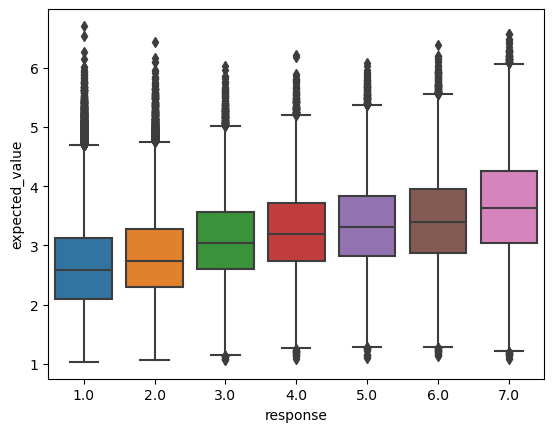

In [74]:
from scipy.stats import spearmanr

data["expected_value"] = m.expected_value(data).data

_ = sns.boxplot(data, x="response", y="expected_value")

spearmanr(data[["response", "expected_value"]])

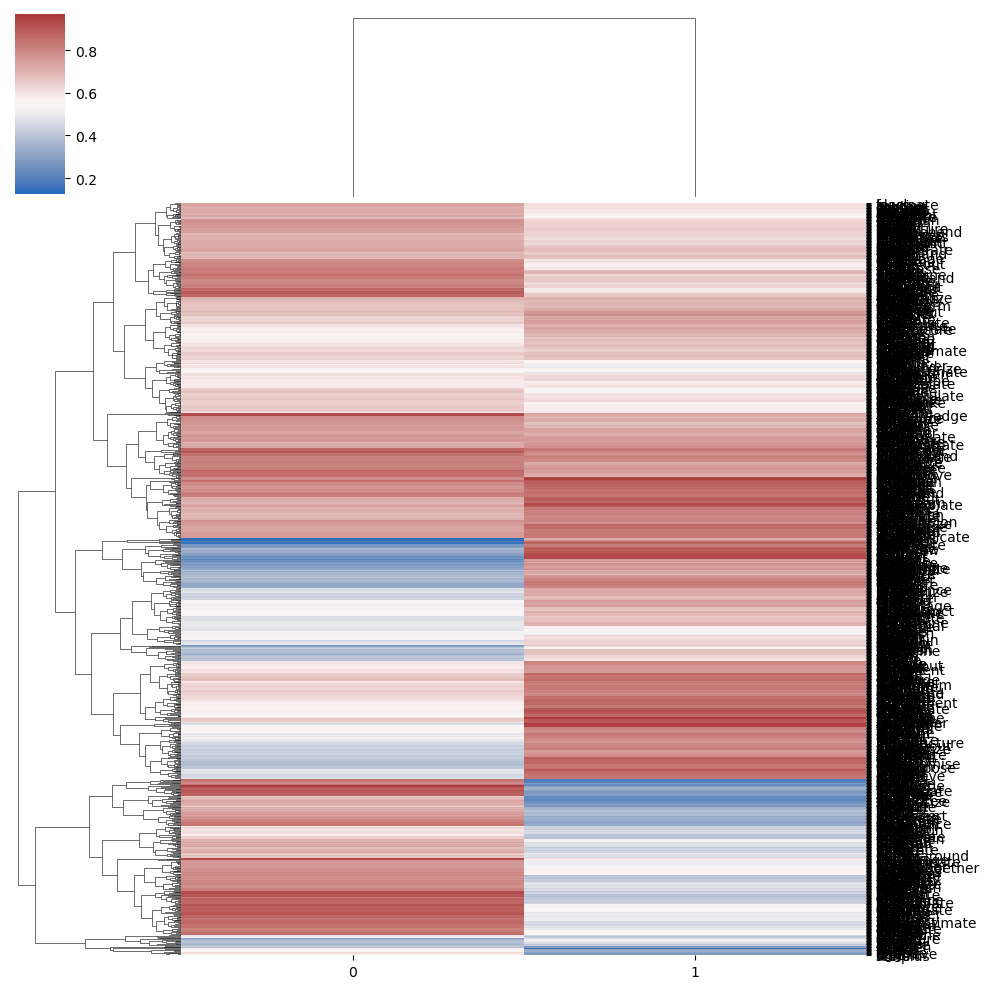

In [76]:
#sns.clustermap(pd.DataFrame(m.model.frame_component_prob.data, index=m.frame_hash_map), cmap="vlag", yticklabels=True)
sns.clustermap(pd.DataFrame(m.model.verb_component_prob.data, index=m.verb_hash_map), cmap="vlag", yticklabels=True)

In [108]:
@dataclass
class ConstrainedSelectionModelParameters(SelectionModelParameters):
    n_clause_component: int
    n_nonclause_component: int

In [113]:
import torch
from torch import Tensor

class ConstrainedSelectionModel(torch.nn.Module):
    parameter_class = ConstrainedSelectionModelParameters
    
    def __init__(self, parameters: ConstrainedSelectionModelParameters):
        super().__init__()
        
        self.model_parameters = parameters
        
        self.verb_clause_aux = torch.nn.Parameter(
            torch.randn([parameters.n_verb]), 
            requires_grad=True
        )
        self.verb_nonclause_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_verb, parameters.n_nonclause_component
            ]), 
            requires_grad=True
        )
        
        self.frame_clause_aux = torch.nn.Parameter(
            torch.randn([parameters.n_frame]), 
            requires_grad=True
        )
        self.frame_nonclause_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_frame, parameters.n_nonclause_component
            ]), 
            requires_grad=True
        )
        
        self.log_clause_jumps = torch.nn.Parameter(
            torch.ones(parameters.n_clause_component-1), 
            requires_grad=True
        )
        
        self.log_jumps = torch.nn.Parameter(
            torch.ones([
                parameters.n_subj, parameters.n_resp_levels-1
            ]), 
            requires_grad=True
        )
        

    def forward(self, data: SelectionData):
        verb_frame_prob = self.verb_frame_prob(data.verb, data.frame)
        verb_frame_logodds = torch.log(verb_frame_prob) - torch.log(1. - verb_frame_prob)
        
        jumps = self.jumps[data.subj]
        
        return ordered_logistic_likelihood(
            verb_frame_logodds, jumps
        )
   
    def verb_frame_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        return self.verb_frame_clause_prob(verb_idx, frame_idx) *\
               self.verb_frame_nonclause_prob(verb_idx, frame_idx)

    def verb_frame_clause_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        if verb_idx is not None or frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[verb_idx,:] * 
                     self.frame_clause_component_prob[frame_idx,:],
                axis=1
            )
        elif verb_idx is None and frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[:,None,:] * 
                     self.frame_clause_component_prob[:,frame_idx,:],
                axis=2
            )
        elif verb_idx is not None and frame_idx is None:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[verb_idx,None,:] * 
                     self.frame_clause_component_prob[None,:,:],
                axis=2
            )
        else:
            return 1. - torch.prod(
                1. - self.verb_clause_component_prob[:,None,:] * 
                     self.frame_clause_component_prob[None,:,:],
                axis=2
            ) 

    def verb_frame_nonclause_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None
    ) -> Tensor:
        if verb_idx is not None or frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[verb_idx,:] * 
                     self.frame_nonclause_component_prob[frame_idx,:],
                axis=1
            )
        elif verb_idx is None and frame_idx is not None:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[:,None,:] * 
                     self.frame_nonclause_component_prob[:,frame_idx,:],
                axis=2
            )
        elif verb_idx is not None and frame_idx is None:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[verb_idx,None,:] * 
                     self.frame_nonclause_component_prob[None,:,:],
                axis=2
            )
        else:
            return 1. - torch.prod(
                1. - self.verb_nonclause_component_prob[:,None,:] * 
                     self.frame_nonclause_component_prob[None,:,:],
                axis=2
            )       
    
    @property
    def verb_clause_component_prob(self) -> Tensor:
        return ordered_logistic_likelihood(
            self.verb_clause_aux, self.clause_jumps[None,:]
        )
    
    @property
    def frame_clause_component_prob(self) -> Tensor:
        return ordered_logistic_likelihood(
            self.frame_clause_aux, self.clause_jumps[None,:]
        )
    
    @property
    def verb_nonclause_component_prob(self) -> Tensor:
        return torch.sigmoid(self.verb_nonclause_aux)
    
    @property
    def frame_nonclause_component_prob(self) -> Tensor:
        return torch.sigmoid(self.frame_nonclause_aux)

    @property
    def clause_jumps(self):
        return torch.exp(self.log_clause_jumps)
    
    @property
    def jumps(self):
        return torch.exp(self.log_jumps)

In [125]:
class ConstrainedSelectionModelTrainer(SelectionModelTrainer):
    parameter_class = ConstrainedSelectionModelParameters
    model_class = ConstrainedSelectionModel
    
    def __init__(self, n_clause_component: int, n_nonclause_component: int):
        self.n_clause_component = n_clause_component
        self.n_nonclause_component = n_nonclause_component
        
        self.loss_function = torch.nn.CrossEntropyLoss(reduction="sum")
    
    def construct_model_parameters(self, data: pd.DataFrame) -> UnconstrainedSelectionModelParameters:
        model_parameters = {
            "n_verb": self.verb_hash_map.shape[0],
            "n_frame": self.frame_hash_map.shape[0],
            "n_subj": self.subj_hash_map.shape[0],
            "n_resp_levels": 7,
            "n_clause_component": self.n_clause_component,
            "n_nonclause_component": self.n_nonclause_component
        }
        
        return self.parameter_class(**model_parameters)
    
m = ConstrainedSelectionModelTrainer(3, 2)
m.fit(data)

Epoch:       0
Loss:        1078181.55
Mean corr.:  0.02



KeyboardInterrupt: 

ValueError: The condensed distance matrix must contain only finite values.

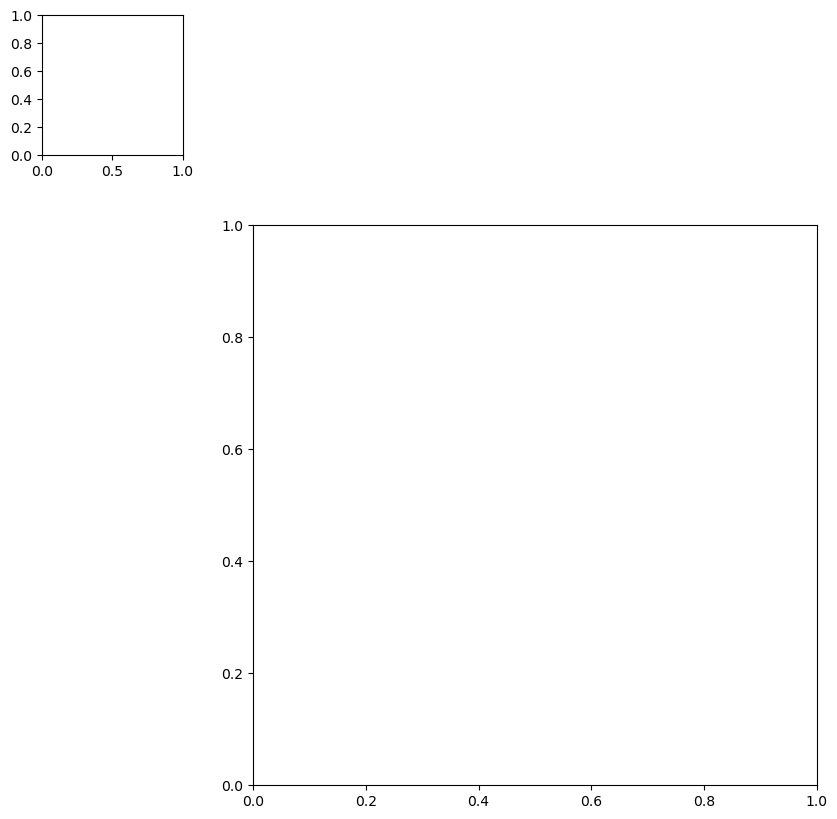

In [123]:
sns.clustermap(pd.DataFrame(m.model.frame_clause_component_prob.data, index=m.frame_hash_map), yticklabels=True)
#sns.clustermap(pd.DataFrame(m.model.verb_component_prob.data, index=m.verb_hash_map), cmap="vlag", yticklabels=True)

In [78]:
ordered_logistic_likelihood??

Signature:
ordered_logistic_likelihood(
    value: torch.Tensor,
    jumps: torch.Tensor,
    center: bool = True,
) -> torch.Tensor
Source:   
def ordered_logistic_likelihood(value: Tensor, jumps: Tensor, center: bool = True) -> Tensor:
    """Compute the ordered logistic likelihood given a value
    
    Parameters
    ----------
    value
        The value to compute the likelihood for 
        (shape: batch_size)
    jumps
        The distance between cutpoints 
        (shape: batch_size x number of response levels - 1)

    Returns
    -------
    log_likelihood
        the ordered logistic log-likelihood
    """
    cutpoints = torch.cumsum(jumps, 1) 
    
    if center:
        cutpoints = cutpoints - cutpoints.mean()
    
    cdfs = torch.sigmoid(cutpoints - value[:,None])

    low_prob = torch.cat(
        [torch.zeros([cdfs.shape[0], 1]), cdfs],
        axis=1
    )
    high_prob = torch.cat(
        [cdfs, torch.ones([cdfs.shape[0], 1])],
        axis=1
    )
    
    retur